In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.2.2

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 22.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TES Project/Condo2.csv")
df.head()

,Location (Kuala Lumpur),Rooms,Bathrooms,Car Parks,Furnishing,Property Details,Size Type,Size Number (sq. ft.),Price Range
0,33,3,2.0,1.0,1,3,0,805.0,Low
1,38,3,2.0,1.0,2,3,0,850.0,Low
2,38,3,2.0,1.0,2,3,0,850.0,Low
3,33,3,2.0,1.0,2,3,0,802.0,Low
4,33,3,2.0,1.0,2,3,0,850.0,Low


In [ ]:
X = df.drop('Price Range', axis=1)  # Features
y = df['Price Range']              # Target

le = LabelEncoder()
X['Location (Kuala Lumpur)'] = le.fit_transform(X['Location (Kuala Lumpur)'])
X['Furnishing'] = le.fit_transform(X['Furnishing'])
X['Property Details'] = le.fit_transform(X['Property Details'])
X['Size Type'] = le.fit_transform(X['Size Type'])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                   test_size =0.2,
                                  random_state=42)

X_train,X_valid,y_train,y_valid=train_test_split( X_train,y_train,
                                   test_size =0.25,
                                  random_state=42)

In [ ]:
print("X_train Shape: ",X_train.shape)
print("y_train Shape: ",y_train.shape)
print()
print("X_test Shape: ",X_test.shape)
print("y_test Shape: ",y_test.shape)
print()
print("X_valid Shape: ",X_valid.shape)
print("y_valid Shape: ",y_valid.shape)

X_train Shape:  (10998, 8)
y_train Shape:  (10998,)

X_test Shape:  (3667, 8)
y_test Shape:  (3667,)

X_valid Shape:  (3667, 8)
y_valid Shape:  (3667,)


In [ ]:
y_train = le.fit_transform(y_train)
y_valid = le.transform(y_valid)
y_test = le.transform(y_test)

In [ ]:
# Initialize XGBoost Classifier
n_classes = len(le.classes_)


clf = XGBClassifier(
    random_state=42,
    tree_method="hist",   # Use histogram-based tree building
    device="cuda",        # Use GPU for training
    eval_metric="mlogloss",  # Multiclass log-loss
    objective="multi:softprob",  # Multiclass classification
    num_class=n_classes  # Set the number of classes explicitly
)


clf.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    verbose=True
)

[0]	validation_0-mlogloss:1.16113
[1]	validation_0-mlogloss:1.01815
[2]	validation_0-mlogloss:0.92678
[3]	validation_0-mlogloss:0.86044
[4]	validation_0-mlogloss:0.80858
[5]	validation_0-mlogloss:0.77198
[6]	validation_0-mlogloss:0.74129
[7]	validation_0-mlogloss:0.71303
[8]	validation_0-mlogloss:0.68481
[9]	validation_0-mlogloss:0.66414
[10]	validation_0-mlogloss:0.64431
[11]	validation_0-mlogloss:0.63074
[12]	validation_0-mlogloss:0.61670
[13]	validation_0-mlogloss:0.60573
[14]	validation_0-mlogloss:0.59637
[15]	validation_0-mlogloss:0.58881
[16]	validation_0-mlogloss:0.58156
[17]	validation_0-mlogloss:0.57363
[18]	validation_0-mlogloss:0.56799
[19]	validation_0-mlogloss:0.56324
[20]	validation_0-mlogloss:0.55732
[21]	validation_0-mlogloss:0.55153
[22]	validation_0-mlogloss:0.54844
[23]	validation_0-mlogloss:0.54443
[24]	validation_0-mlogloss:0.54069
[25]	validation_0-mlogloss:0.53617
[26]	validation_0-mlogloss:0.53457
[27]	validation_0-mlogloss:0.53268
[28]	validation_0-mlogloss:0.5

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=4, num_parallel_tree=None, ...)

In [ ]:

y_pred_train = clf.predict(X_train)

y_pred_test = clf.predict(X_test)

y_pred_valid = clf.predict(X_valid)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:32:09] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [ ]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
valid_accuracy = accuracy_score(y_valid, y_pred_valid)

print("Train Accuracy: ", train_accuracy*100)
print("Test Accuracy: ", test_accuracy*100)
print("Valid Accuracy: ", valid_accuracy*100)

Train Accuracy:  90.76195671940353
Test Accuracy:  81.59258249250068
Valid Accuracy:  82.49250068175621


In [ ]:
print(classification_report(y_test,y_pred_test,labels= clf.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       903
           1       0.78      0.77      0.78       913
           2       0.84      0.87      0.85       909
           3       0.75      0.73      0.74       942

    accuracy                           0.82      3667
   macro avg       0.82      0.82      0.82      3667
weighted avg       0.81      0.82      0.82      3667



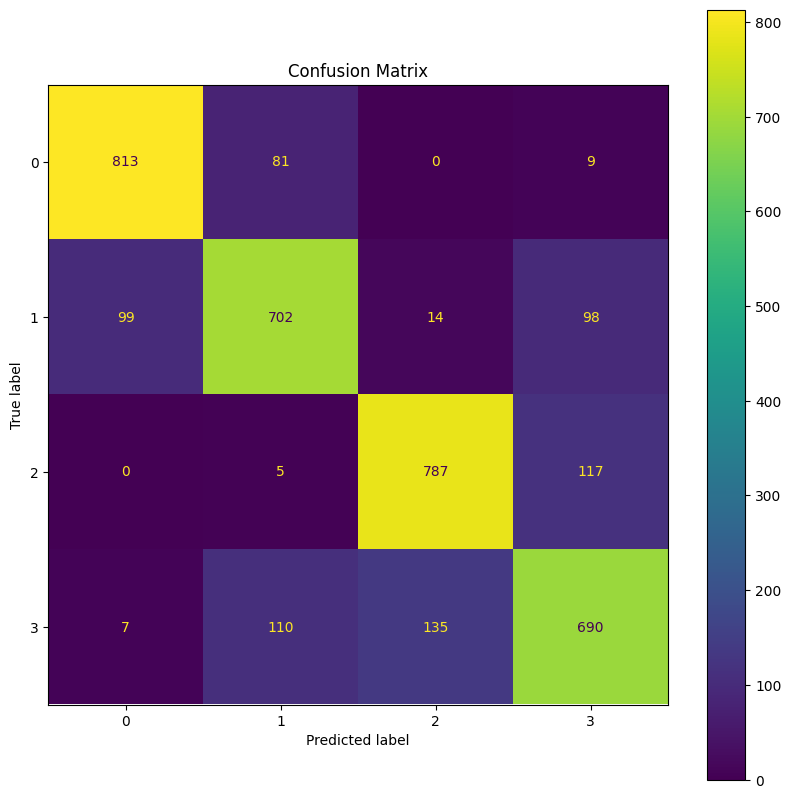

In [ ]:
class_names = clf.classes_.tolist()

cm = confusion_matrix(y_test,y_pred_test,labels = clf.classes_.tolist())

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= class_names)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

In [ ]:
y_test_encoded = le.fit_transform(y_test)
y_pred_test_encoded = le.transform(y_pred_test)

y_pred_test_proba = clf.predict_proba(X_test)

print(roc_auc_score(y_test_encoded, y_pred_test_proba, multi_class='ovo'))

0.9596410691435198


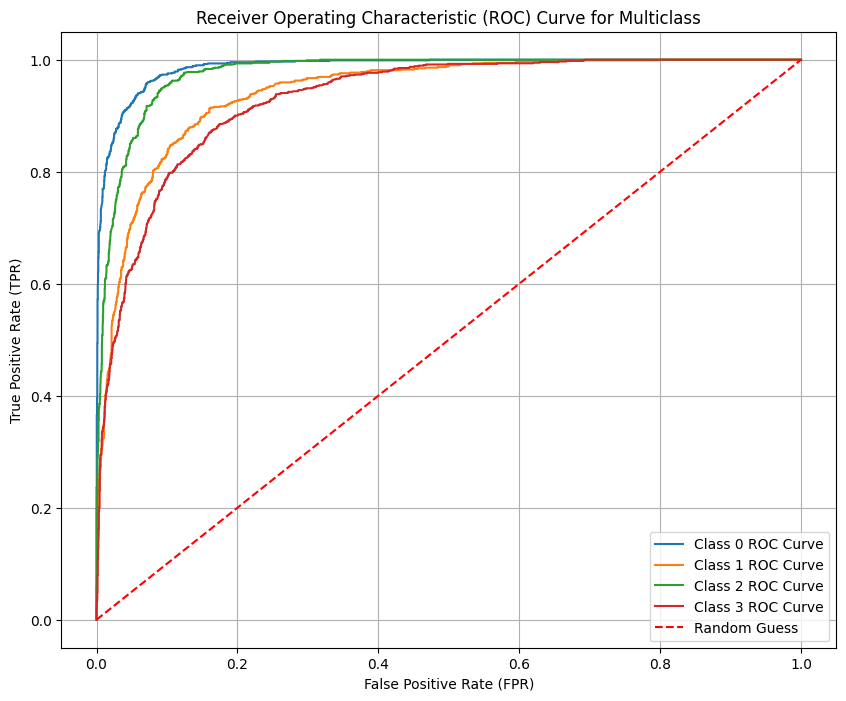

In [ ]:
y_test_binarized = label_binarize(y_test_encoded, classes=range(len(set(y_test_encoded))))

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_test_binarized[:, i], y_pred_test_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} ROC Curve')

# Plot diagonal
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')

# Plot settings
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
print(classification_report(y_valid,y_pred_valid,labels= clf.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       886
           1       0.80      0.79      0.79       927
           2       0.86      0.85      0.86       952
           3       0.76      0.75      0.76       902

    accuracy                           0.82      3667
   macro avg       0.82      0.83      0.82      3667
weighted avg       0.82      0.82      0.82      3667



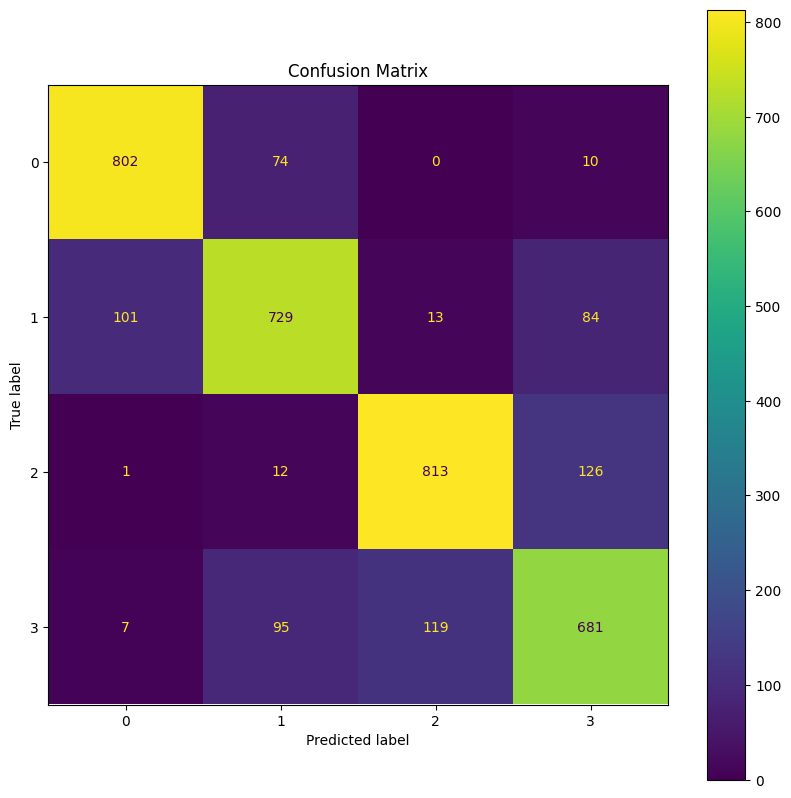

In [ ]:
cm = confusion_matrix(y_valid,y_pred_valid,labels = clf.classes_.tolist())

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= class_names)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)

In [ ]:
y_valid_encoded = le.fit_transform(y_valid)
y_pred_valid_encoded = le.transform(y_pred_valid)

y_pred_valid_proba = clf.predict_proba(X_valid)

print(roc_auc_score(y_valid_encoded, y_pred_valid_proba, multi_class="ovo"))

0.9583098120461999


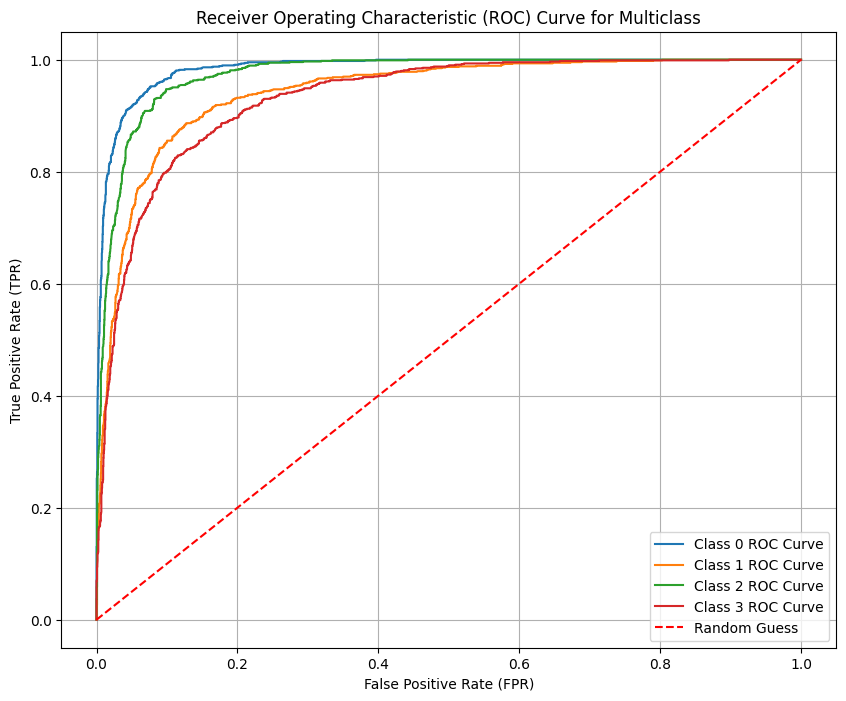

In [ ]:
y_valid_binarized = label_binarize(y_valid_encoded, classes=range(len(set(y_valid_encoded))))

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_valid_binarized[:, i], y_pred_valid_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} ROC Curve')

# Plot diagonal
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')

# Plot settings
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Decision Tree feature importance saved at: /content/drive/MyDrive/Colab Notebooks/Data Mining/Project/XGB_feature importance.png


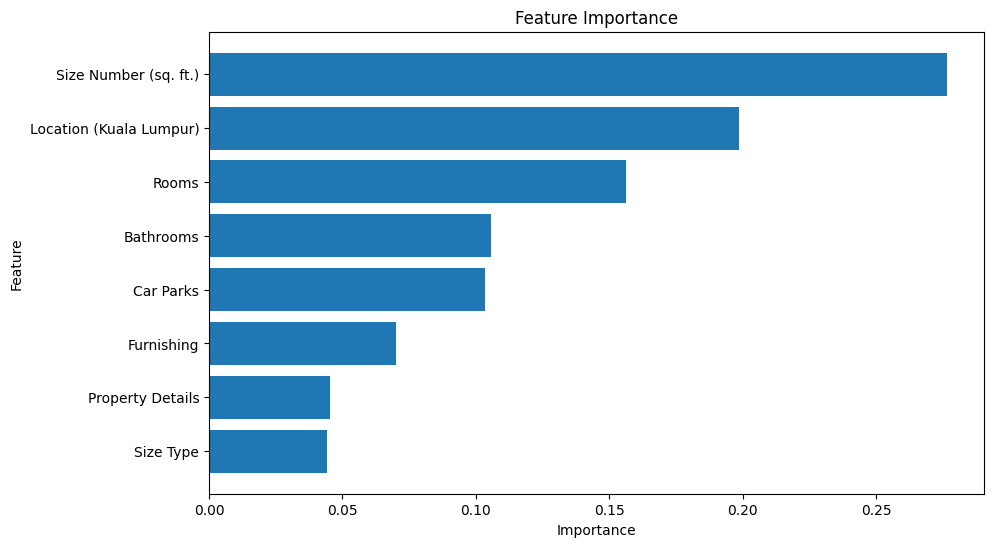

In [ ]:
# Feature importance
feature_importances = clf.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")

save_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining/Project/XGB_feature importance.png'
plt.savefig(save_path, format='png', bbox_inches='tight')
print(f"Decision Tree feature importance saved at: {save_path}")

plt.show()

In [ ]:
save_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining/Project/XGB_model.joblib'

joblib.dump(clf, save_path)

print(f"Best XGB model saved to: {save_path}")

Best XGB model saved to: /content/drive/MyDrive/Colab Notebooks/Data Mining/Project/XGB_model.joblib
